# Desenvolvimento do Corona por UF
Esse trabalho mostra quantos dias demorou para cada estado ter seu desenvolvimento de casos.

In [1]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = "\\".join(os.getcwd().split("\\")[:-2]) # + "\\common_data"
path

'C:\\Users\\Camila\\Documents\\git\\common_data'

In [3]:
# Importing the Excel file with all the cities
# covid_munic = pd.read_excel("BRASILIO_2005 (version 1).xlsx")
covid_munic = pd.read_csv(path + "\data\caso_full_with_indicators.csv")
covid_munic["date"] = pd.to_datetime(covid_munic['date'], format="%Y/%m/%d")
covid_munic.head(1)

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,...,AGUA_ESGOTO,T_RMAXIDOSO,IDHM,IDHM_E,IDHM_L,IDHM_R,distance_capital,distance_nearest_capital,distance_nearest_bigcity,health_region
0,Importados/Indefinidos,9.0,2020-03-29,14,NaN,False,False,4,NaN,2020-03-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sem informação


In [4]:
# Understanding the data
covid_munic[covid_munic["city_ibge_code"] == 4307500.0] #[["date", "is_last", "is_repeated", "last_available_confirmed", "new_confirmed"]]

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,...,AGUA_ESGOTO,T_RMAXIDOSO,IDHM,IDHM_E,IDHM_L,IDHM_R,distance_capital,distance_nearest_capital,distance_nearest_bigcity,health_region
298707,Espumoso,4307500.0,2020-04-13,16,15588.0,False,False,1,6.41519,2020-04-13,...,0.4,0.91,0.765,0.677,0.884,0.747,215.02,215.02,67.58,CRS 06 Passo Fundo
298708,Espumoso,4307500.0,2020-04-14,16,15588.0,False,False,1,6.41519,2020-04-14,...,0.4,0.91,0.765,0.677,0.884,0.747,215.02,215.02,67.58,CRS 06 Passo Fundo
298709,Espumoso,4307500.0,2020-04-15,16,15588.0,False,False,1,6.41519,2020-04-15,...,0.4,0.91,0.765,0.677,0.884,0.747,215.02,215.02,67.58,CRS 06 Passo Fundo
298710,Espumoso,4307500.0,2020-04-16,16,15588.0,False,False,1,6.41519,2020-04-16,...,0.4,0.91,0.765,0.677,0.884,0.747,215.02,215.02,67.58,CRS 06 Passo Fundo
298711,Espumoso,4307500.0,2020-04-17,16,15588.0,False,False,1,6.41519,2020-04-17,...,0.4,0.91,0.765,0.677,0.884,0.747,215.02,215.02,67.58,CRS 06 Passo Fundo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298792,Espumoso,4307500.0,2020-07-07,28,15588.0,False,False,23,147.54940,2020-07-07,...,0.4,0.91,0.765,0.677,0.884,0.747,215.02,215.02,67.58,CRS 06 Passo Fundo
298793,Espumoso,4307500.0,2020-07-08,28,15588.0,False,False,23,147.54940,2020-07-08,...,0.4,0.91,0.765,0.677,0.884,0.747,215.02,215.02,67.58,CRS 06 Passo Fundo
298794,Espumoso,4307500.0,2020-07-09,28,15588.0,False,False,24,153.96459,2020-07-09,...,0.4,0.91,0.765,0.677,0.884,0.747,215.02,215.02,67.58,CRS 06 Passo Fundo
298795,Espumoso,4307500.0,2020-07-10,28,15588.0,False,False,25,160.37978,2020-07-10,...,0.4,0.91,0.765,0.677,0.884,0.747,215.02,215.02,67.58,CRS 06 Passo Fundo


In [5]:
# We have the data in 2 ways, by city (not all in there) and state, watch out to not duplicate
# We will use only place_type = "state" for this analysis
covid_munic.groupby("place_type")[["new_confirmed", "new_deaths"]].sum()

,new_confirmed,new_deaths
place_type,,
city,1826576,70910
state,1841909,71540


In [6]:
print("Last updated in: {:%d/%m/%Y}".format(max(covid_munic["date"])))

Last updated in: 11/07/2020


In [30]:
# We just need it by UF, so let's aggregate them
# Only leaving cases where we have at least one confirmed or one death
# And then create a cumulative frequency for confirmed cases and death 

covid_uf = covid_munic[covid_munic["place_type"] == "state"].groupby(["state", "date"])["new_confirmed", "new_deaths"].sum().reset_index()

covid_uf = covid_uf[(covid_uf["new_confirmed"] > 0) | (covid_uf["new_deaths"] > 0)]

covid_uf["date"] = pd.to_datetime(covid_uf['date'], format="%Y/%m/%d")

# Adding cumulative
covid_uf['Cumulative Confirmed'] = covid_uf.groupby('state')['new_confirmed'].cumsum()
covid_uf['Cumulative Death'] = covid_uf.groupby('state')['new_deaths'].cumsum()
covid_uf.tail(2)

C:\Users\Camila\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,state,date,new_confirmed,new_deaths,Cumulative Confirmed,Cumulative Death
3262,TO,2020-07-09,664,5,14509,245
3263,TO,2020-07-10,430,6,14939,251


In [31]:
print("First date: {:%d/%m/%Y}".format(min(covid_uf["date"])))
print("Last updated in: {:%d/%m/%Y}".format(max(covid_uf["date"])))
covid_uf[["new_confirmed", "new_deaths"]].sum()

First date: 25/02/2020
Last updated in: 11/07/2020


new_confirmed    1841909
new_deaths         71540
dtype: int64

In [32]:
covid_uf.groupby("date")["state"].count().tail(10)

date
2020-07-02    26
2020-07-03    27
2020-07-04    27
2020-07-05    26
2020-07-06    27
2020-07-07    27
2020-07-08    27
2020-07-09    27
2020-07-10    27
2020-07-11    23
Name: state, dtype: int64

In [33]:
# Because we only have 15 states on our last date and 23 on our second last, we will delete both
covid_uf = covid_uf[ covid_uf["date"] < max(covid_uf["date"])]
# covid_uf = covid_uf[ covid_uf["date"] < max(pd.to_datetime(['2020-06-12'], format="%Y/%m/%d"))]

print("We have {} states with last updated in: {:%d/%m/%Y}".
      format(covid_uf[covid_uf["date"] == max(covid_uf["date"])] ["state"].count(), 
             max(covid_uf["date"])))

We have 27 states with last updated in: 10/07/2020


In [34]:
# Getting first cases in Brazil for confirmed and death
last_updated = max(covid_uf["date"])
first_br_confirmed = covid_uf[covid_uf["new_confirmed"] > 0]["date"].min()
first_br_death = covid_uf[covid_uf["new_deaths"] > 0]["date"].min()
print("First confirmed and death in Brasil: {:%d/%m/%Y} and {:%d/%m/%Y}".format(first_br_confirmed, first_br_death))

First confirmed and death in Brasil: 25/02/2020 and 17/03/2020


In [113]:
# Now let's get a summary for the UF
covid_uf_summary = covid_uf.groupby(["state"])["new_confirmed", "new_deaths"].sum()

#Creating a label for the graph with # cases
covid_uf_summary["Estado"] = [' - '.join(i) for i in 
                              zip(covid_uf_summary.index.values, covid_uf_summary["new_confirmed"].map(str) )]

# Create Region
region = {'AC': "Norte", 'AM': "Norte", 'AP': "Norte", 'PA': "Norte", 'RO': "Norte", 'RR': "Norte", 'TO': "Norte",
          'AL': "Nordeste", 'BA': "Nordeste", 'CE': "Nordeste", 'MA': "Nordeste", 'PB': "Nordeste", 'PE': "Nordeste", 
          'PI': "Nordeste", 'RN': "Nordeste", 'SE': "Nordeste", 
          'DF': "Centro Oeste", 'GO': "Centro Oeste", 'MS': "Centro Oeste", 'MT': "Centro Oeste",
          'ES': "Sudeste", 'MG': "Sudeste", 'RJ': "Sudeste", 'SP': "Sudeste",
          'PR': "Sul", 'SC': "Sul", 'RS': "Sul"}

covid_uf_summary['Region'] = covid_uf_summary.index.to_series().map(region)
# .apply(lambda x: region[x["state"]], axis=1)

covid_uf_summary.tail(2)

C:\Users\Camila\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,new_confirmed,new_deaths,Estado,Region
state,,,,
SP,359110,17442,SP - 359110,Sudeste
TO,14939,251,TO - 14939,Norte


In [114]:
covid_uf_summary.sum()

new_confirmed                                              1809366
new_deaths                                                   70646
Estado           AC - 15768AL - 43959AM - 82507AP - 31080BA - 1...
Region           NorteNordesteNorteNorteNordesteNordesteCentro ...
dtype: object

In [115]:
# Now we create the Dates and "days since" that we want
covid_uf_summary["Date Case 1 in UF"] = covid_uf[covid_uf["new_confirmed"] > 0].groupby("state")["date"].min()
covid_uf_summary["Date first death in UF"] = covid_uf[covid_uf["new_deaths"] > 0].groupby("state")["date"].min()
covid_uf_summary["Dias entre Caso 1 brasileiro e Caso 1 na UF"] = (covid_uf_summary["Date Case 1 in UF"] - first_br_confirmed).dt.days
covid_uf_summary["Dias entre Caso 1 brasileiro e morte na UF"] = (covid_uf_summary["Date first death in UF"] - first_br_confirmed).dt.days
covid_uf_summary["Dias entre Caso 1 e morte na UF"] = (covid_uf_summary["Date first death in UF"] - covid_uf_summary["Date Case 1 in UF"]).dt.days

#Creating variables for each slice - YOU CAN CHANGE THOSE NUMBERS IF YOU WANT
cases_slice = [1, 1000, 2000, 4000, 8000, 16000, 32000, 64000] #1, 100, 500, 1000, 2000, 5000, 10000, 20000 
for s in range(1, len(cases_slice)):
    num_cases = cases_slice[s]
    num_cases_pre = cases_slice[s-1]
    covid_uf_summary["Date Case {} in UF".format(str(num_cases
                                                    ))] = covid_uf[covid_uf["Cumulative Confirmed"] > 
                                                                   num_cases].groupby("state")["date"].min()
    covid_uf_summary["Dias entre Caso {} e {} na UF".format(
        str(num_cases_pre), str(num_cases))] = (covid_uf_summary["Date Case {} in UF".format(str(num_cases
                                                    ))] - covid_uf_summary["Date Case {} in UF".format(str(num_cases_pre
                                                    ))]).dt.days
    

covid_uf_summary.tail(2)

,new_confirmed,new_deaths,Estado,Region,Date Case 1 in UF,Date first death in UF,Dias entre Caso 1 brasileiro e Caso 1 na UF,Dias entre Caso 1 brasileiro e morte na UF,Dias entre Caso 1 e morte na UF,Date Case 1000 in UF,...,Date Case 4000 in UF,Dias entre Caso 2000 e 4000 na UF,Date Case 8000 in UF,Dias entre Caso 4000 e 8000 na UF,Date Case 16000 in UF,Dias entre Caso 8000 e 16000 na UF,Date Case 32000 in UF,Dias entre Caso 16000 e 32000 na UF,Date Case 64000 in UF,Dias entre Caso 32000 e 64000 na UF
state,,,,,,,,,,,,,,,,,,,,,
SP,359110,17442,SP - 359110,Sudeste,2020-02-25,2020-03-17,0,21,21,2020-03-26,...,2020-04-03,3,2020-04-10,7,2020-04-23,13.0,2020-05-04,11.0,2020-05-19,15.0
TO,14939,251,TO - 14939,Norte,2020-03-18,2020-04-15,22,50,28,2020-05-13,...,2020-05-31,10,2020-06-19,19,NaT,NaN,NaT,NaN,NaT,NaN


In [116]:
### 12/07 Adding first school closing
schools = pd.read_excel(path + "\data\outras\\fechamento de escolas.xlsx", skipfooter=5)
schools["Data da Primeira Medida de Enfrentamento que interfere na mobilidade da população"] = pd.to_datetime(schools["Data da Primeira Medida de Enfrentamento que interfere na mobilidade da população"], format="%Y-%m-%d")

state = {'Acre': "AC", 'Amazonas': "AM", 'Amapá': "AP", 'Pará': "PA", 'Rondônia': "RO", 'Roraima': "RR", 'Tocantins': "TO",
          'Alagoas': "AL", 'Bahia': "BA", 'Ceará': "CE", 'Maranhão': "MA", 'Paraiba': "PB", 'Pernambuco': "PE", 
          'Piauí': "PI", 'Rio Grande do Norte': "RN", 'Sergipe': "SE", 
          'Distrito Federal': "DF", 'Goiás': "GO", 'Mato Grosso do Sul': "MS", 'Mato Grosso': "MT",
          'Espírito Santo': "ES", 'Minas Gerais': "MG", 'Rio de Janeiro': "RJ", 'São Paulo': "SP",
          'Paraná': "PR", 'Santa Catarina': "SC", 'Rio Grande do Sul': "RS"}

schools['state'] = schools["Estado"].map(state)
schools.rename(columns={'Data da Primeira Medida de Enfrentamento que interfere na mobilidade da população':'First Closing Date'}, inplace=True)
to_merge = schools.groupby('state').min()["First Closing Date"]
print(to_merge)

covid_uf_summary = pd.merge(covid_uf_summary, to_merge, how="left", left_index=True, right_index=True)
covid_uf_summary["Dias entre Caso 1 brasileiro e 1o fechamento"] = (covid_uf_summary["First Closing Date"] - first_br_confirmed).dt.days
covid_uf_summary["Dias entre Caso 1 e 1o fechamento na UF"] = (covid_uf_summary["First Closing Date"] - covid_uf_summary["Date Case 1 in UF"]).dt.days

covid_uf_summary.head(2)

state
AC   2020-03-16
AL   2020-03-17
AM   2020-03-16
AP   2020-03-17
BA   2020-03-16
CE   2020-03-16
DF   2020-03-11
ES   2020-03-17
GO   2020-03-13
MA   2020-03-21
MG   2020-03-15
MS   2020-03-16
MT   2020-03-16
PA   2020-03-16
PB   2020-03-20
PE   2020-03-17
PI   2020-03-19
PR   2020-03-16
RJ   2020-03-27
RN   2020-03-13
RO   2020-03-16
RR   2020-03-22
RS   2020-03-16
SC   2020-03-17
SE   2020-03-24
SP   2020-03-22
TO   2020-03-13
Name: First Closing Date, dtype: datetime64[ns]


,new_confirmed,new_deaths,Estado,Region,Date Case 1 in UF,Date first death in UF,Dias entre Caso 1 brasileiro e Caso 1 na UF,Dias entre Caso 1 brasileiro e morte na UF,Dias entre Caso 1 e morte na UF,Date Case 1000 in UF,...,Dias entre Caso 4000 e 8000 na UF,Date Case 16000 in UF,Dias entre Caso 8000 e 16000 na UF,Date Case 32000 in UF,Dias entre Caso 16000 e 32000 na UF,Date Case 64000 in UF,Dias entre Caso 32000 e 64000 na UF,First Closing Date,Dias entre Caso 1 brasileiro e 1o fechamento,Dias entre Caso 1 e 1o fechamento na UF
state,,,,,,,,,,,,,,,,,,,,,
AC,15768,417,AC - 15768,Norte,2020-03-17,2020-04-06,21,41,20,2020-05-07,...,15,NaT,NaN,NaT,NaN,NaT,NaN,2020-03-16,20,-1
AL,43959,1246,AL - 43959,Nordeste,2020-03-08,2020-03-31,12,35,23,2020-04-30,...,10,2020-06-07,10.0,2020-06-25,18.0,NaT,NaN,2020-03-17,21,9


In [123]:
# Function to add the label
def labeling(ax):
    
    for rect in ax.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The width of the bar is the data value and can used as the label
        label_text = f'{width:.0f}'  # f'{height:.2f}' to format decimal values
        
        if np.isnan(x) == False and np.isnan(y) == False and width > 0:
            label_x = x + width - 0.2  # adjust 0.2 to center the label
            label_y = y + height / 2
            ax.text(label_x, label_y, label_text, ha='right', va='center', fontsize=9, color='white', fontname='MS Gothic')

# Formatting the graph
def graph_features(ax, fig, text_order_by):
    # Put the value labels
    labeling(ax)
    
    # Adding legend on the bottom
    handles, labels = plt.gca().get_legend_handles_labels()
    order = list(range(2, len(columns_for_graph) + 2))
    order.extend([0, 1])
    
    leg = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]
               , bbox_to_anchor=(0.45, -0.15), ncol=3, loc='lower center'
               , facecolor = 'white', frameon=False)    
    for text in leg.get_texts():
        plt.setp(text, color = 'w')
    # Adding a text as the title of legend as the above I was not able to change the color
    fig.text(0.5, 0.08, "Dias entre", ha='center', va='center', fontsize=11, color='white', fontname='MS Gothic')
    
    # Taking out boarders and grid - Changing color of grid and background
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(color='#A9A9A9', axis = 'x', linewidth=0.5)
    ax.set_facecolor('#696969') # #696969
    fig.set_facecolor("black")
    ax.tick_params(axis='x', colors="white")
    ax.tick_params(axis='y', colors="white")

    # Getting titles right
    plt.suptitle('Tempo de desenvolvimento do COVID-19 por UF'
                 , fontsize=16, fontname='MS Gothic', color = 'white')
    plt.title('Ordenado por {}. Atualizado em {:%d/%m/%Y}'.format(text_order_by, last_updated)
              , fontsize=10, fontname='MS Gothic', color = 'white')
    plt.ylabel('Estado', fontname='MS Gothic')
    plt.xlabel('Dias', fontname='MS Gothic')

#     # Add logo
#     im = matplotlib.image.imread(path + '\logo\marca BRANCA_vertical.png')
#     newax = fig.add_axes([0.82, -0.105, 0.2, 0.2], anchor='NE', frameon = False)
#     newax.imshow(im)
#     newax.axis('off')
# # # The one below puts inside the axis
# #     logo_position = ax.get_xlim()[1] * 0.91
# #     imagebox = matplotlib.offsetbox.OffsetImage(im, zoom=0.0175)
# #     ab = matplotlib.offsetbox.AnnotationBbox(imagebox, (logo_position, -0.2), frameon = False)
# #     ax.add_artist(ab)
    
    # Final touch
    fig.tight_layout()
    fig.subplots_adjust(top=0.94)

# Making the graph
# Taken from here: https://pstblog.com/2016/10/04/stacked-charts
# But changed to a barh
def creating_graph(table, text_order_by, with_grey=1):
    fig, ax = plt.subplots(figsize=(10,12))

    margin_bottom = np.zeros(len(table['Estado'].drop_duplicates()))
    
    # Creating the stacked bars
    for num, variable in enumerate(columns_for_graph[::-1]):

        rects = table.fillna(0).plot.barh(x="Estado",y=columns_for_graph[num], ax=ax, stacked=True, 
                                        left = margin_bottom, color=colors[num], 
                                        label=str(columns_for_graph[num]).replace("Dias entre ", "") )
        margin_bottom += table[columns_for_graph[num]].fillna(value = 0)

    # Adding the 1st deaths
    if with_grey == 1:
        grey_var = "Dias entre Caso 1 brasileiro e morte na UF"
    else: 
        grey_var = "Dias entre Caso 1 e morte na UF"
    marker = plt.plot(table[grey_var], table["Estado"]
             , marker="P", linestyle="", alpha=0.8, color="red", label=str(grey_var).replace("Dias entre ", ""))
    
    # Adding first closing date
    if with_grey == 1:
        grey_var = "Dias entre Caso 1 brasileiro e 1o fechamento"
    else: 
        grey_var = "Dias entre Caso 1 e 1o fechamento na UF"
    marker = plt.plot(table[grey_var], table["Estado"]
             , marker="p", linestyle="", alpha=0.8, color="purple", label=str(grey_var).replace("Dias entre ", ""))

    graph_features(ax, fig, text_order_by)

In [119]:
# With grey bar 
columns_for_graph = [k for k in list(covid_uf_summary.columns)  if 'Dias entre Caso' in k]
columns_for_graph.remove('Dias entre Caso 1 brasileiro e morte na UF')
columns_for_graph.remove('Dias entre Caso 1 e morte na UF')
columns_for_graph.remove('Dias entre Caso 1 e 1o fechamento na UF')
columns_for_graph.remove('Dias entre Caso 1 brasileiro e 1o fechamento')

print(columns_for_graph[::-1])

# colors = ["#8B0000", "#B22222","#DC143C", "#CD5C5C", "#F08080", "#E9967A", "#FA8072", "#FFA07A"][::-1]
# colors = ["#006400", "#6B8E23", "#8da341", "#c7b65f", "#FFA07A", "#e57155", "#DC143C", "#8B0000"]
colors = ["#A09F9E", "#6B8E23", "#8da341", "#c7b65f", "#FFD453", "#F7A400", "#CA5C4A", "#991f2a"]

['Dias entre Caso 32000 e 64000 na UF', 'Dias entre Caso 16000 e 32000 na UF', 'Dias entre Caso 8000 e 16000 na UF', 'Dias entre Caso 4000 e 8000 na UF', 'Dias entre Caso 2000 e 4000 na UF', 'Dias entre Caso 1000 e 2000 na UF', 'Dias entre Caso 1 e 1000 na UF', 'Dias entre Caso 1 brasileiro e Caso 1 na UF']


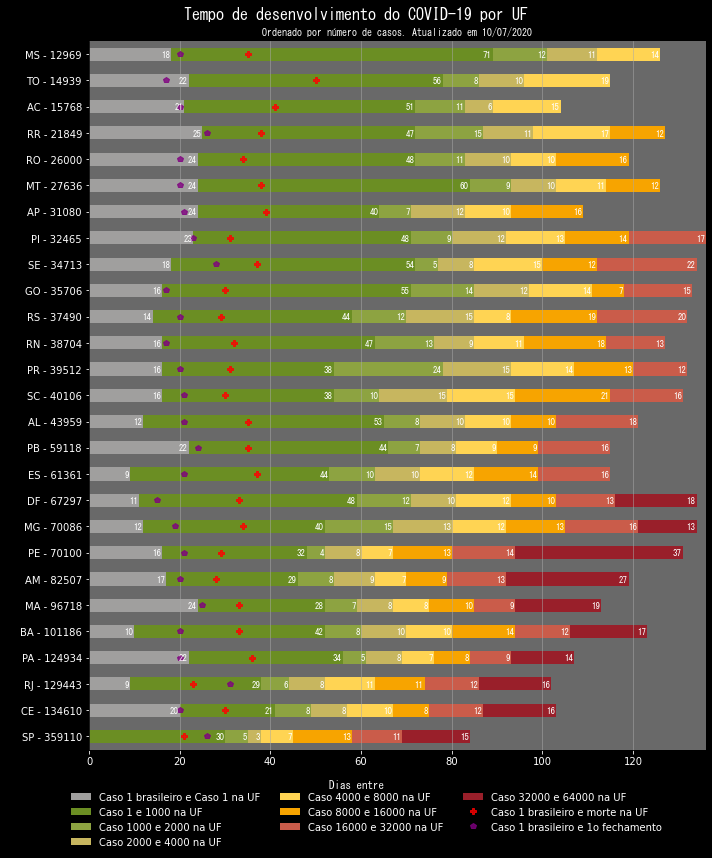

In [124]:
# With grey bar ordered by # of cases

covid_uf_summary.sort_values(by="new_confirmed", ascending = False, inplace=True)

creating_graph(covid_uf_summary, "número de casos")
    
plt.savefig('Tempo de desenvolvimento do Covid por estado_comcinza_numerodecasos.png', facecolor="black")

C:\Users\Camila\anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


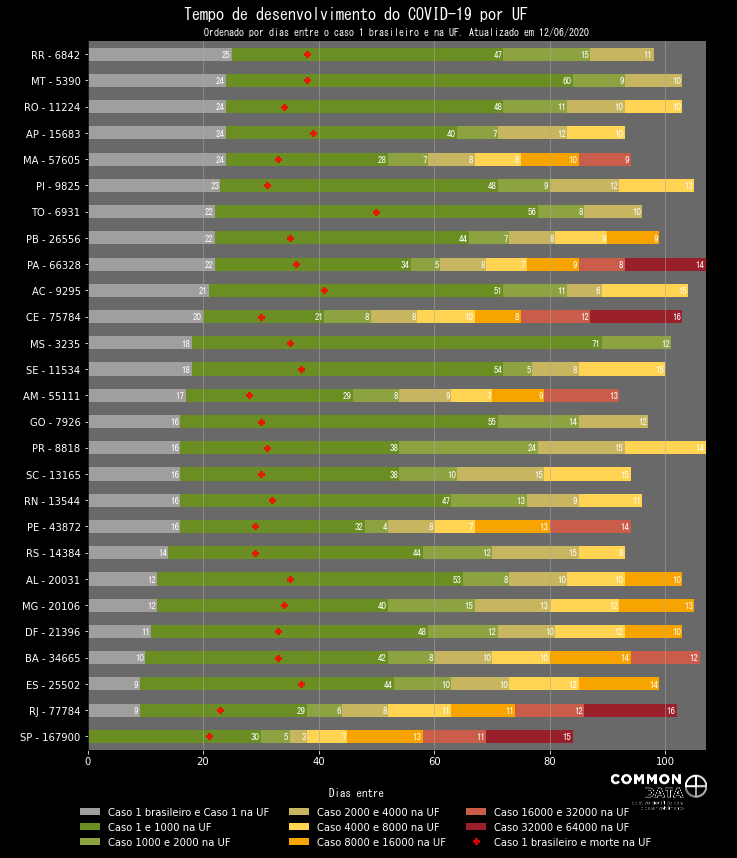

In [18]:
# With grey and ordered by First UF with cases

covid_uf_summary.sort_values(by=["Dias entre Caso 1 brasileiro e Caso 1 na UF", "new_confirmed"]
                             , ascending = (True, False), inplace=True)

creating_graph(covid_uf_summary, "dias entre o caso 1 brasileiro e na UF")
    
plt.savefig('Tempo de desenvolvimento do Covid por estado_comcinza_primeiro atingidas.png', facecolor="black")

C:\Users\Camila\anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


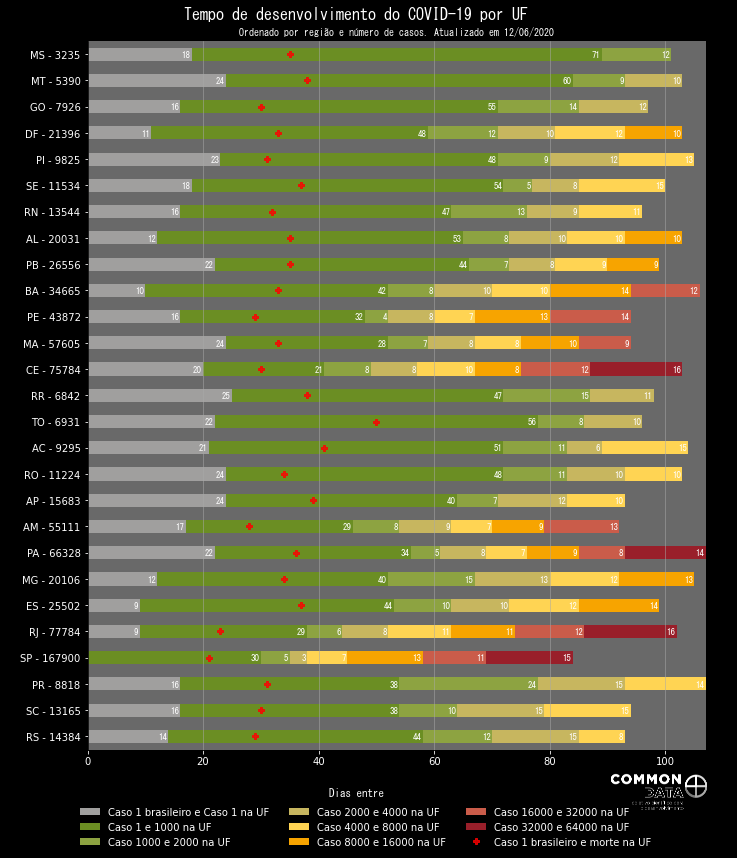

In [19]:
# With grey and ordered by Region and # cases

covid_uf_summary.sort_values(by=["Region", "new_confirmed"]
                             , ascending = (False, False), inplace=True)

creating_graph(covid_uf_summary, "região e número de casos")
    
plt.savefig('Tempo de desenvolvimento do Covid por estado_comcinza_regiao.png', facecolor="black")

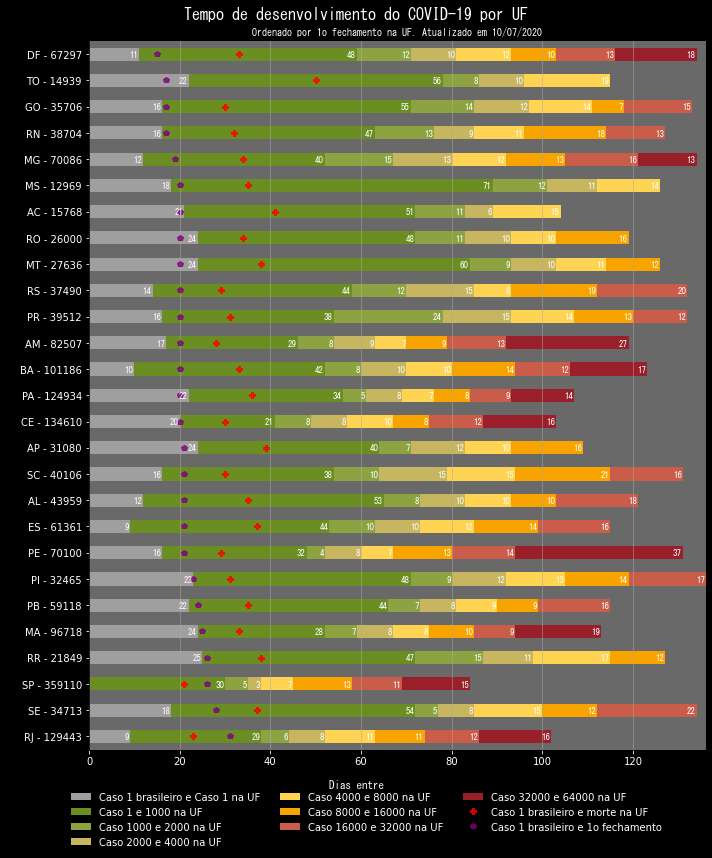

In [127]:
# With grey bar ordered by # days from 1st closing date

covid_uf_summary.sort_values(by=["Dias entre Caso 1 brasileiro e 1o fechamento", "new_confirmed"], ascending = [False, False], inplace=True)

creating_graph(covid_uf_summary, "1o fechamento na UF")
    
plt.savefig('Tempo de desenvolvimento do Covid por estado_comcinza_fechamento.png', facecolor="black")

In [20]:
columns_for_graph = [k for k in list(covid_uf_summary.columns)  if 'Dias entre Caso' in k]
columns_for_graph.remove('Dias entre Caso 1 brasileiro e morte na UF')
columns_for_graph.remove('Dias entre Caso 1 e morte na UF')
columns_for_graph.remove('Dias entre Caso 1 brasileiro e Caso 1 na UF')
print(columns_for_graph[::-1])

# colors = ["#8B0000", "#B22222","#DC143C", "#CD5C5C", "#F08080", "#E9967A", "#FA8072", "#FFA07A"][::-1]
# colors = ["#006400", "#6B8E23", "#8da341", "#c7b65f", "#FFA07A", "#e57155", "#DC143C", "#8B0000"]
# colors = ["#A09F9E", "#6B8E23", "#8da341", "#c7b65f", "#FFD453", "#F7A400", "#CA5C4A", "#991f2a"]
colors = ["#6B8E23", "#8da341", "#c7b65f", "#FFD453", "#F7A400", "#CA5C4A", "#991f2a"]

['Dias entre Caso 32000 e 64000 na UF', 'Dias entre Caso 16000 e 32000 na UF', 'Dias entre Caso 8000 e 16000 na UF', 'Dias entre Caso 4000 e 8000 na UF', 'Dias entre Caso 2000 e 4000 na UF', 'Dias entre Caso 1000 e 2000 na UF', 'Dias entre Caso 1 e 1000 na UF']


C:\Users\Camila\anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


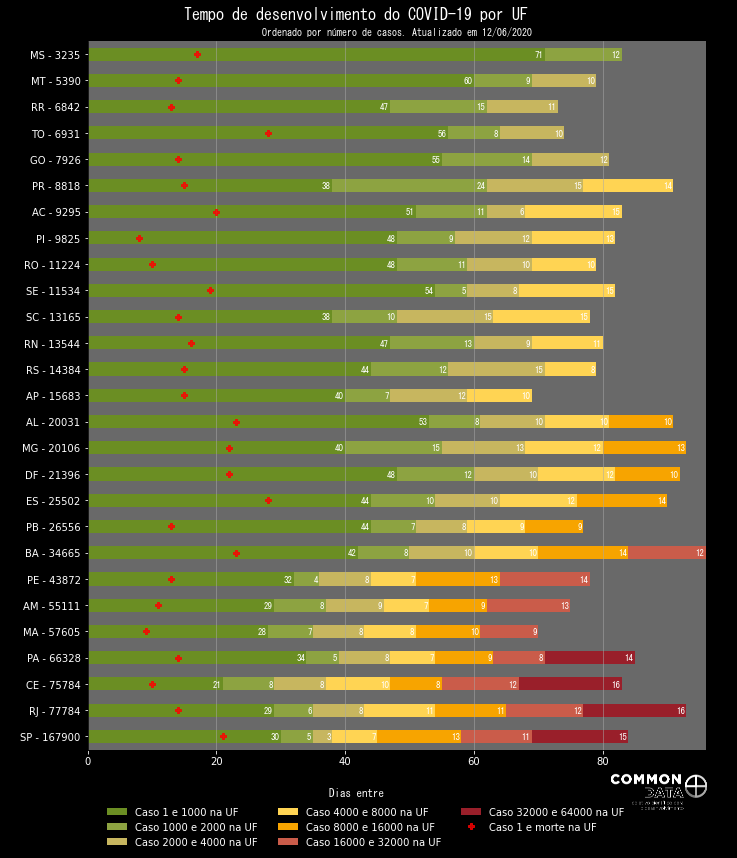

In [21]:
# Without grey and ordered by number of cases

covid_uf_summary.sort_values(by=["new_confirmed"]
                             , ascending = False, inplace=True)

creating_graph(covid_uf_summary, "número de casos", 0)
    
plt.savefig('Tempo de desenvolvimento do Covid por estado_semcinza_numerodecasos.png', facecolor="black")

C:\Users\Camila\anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


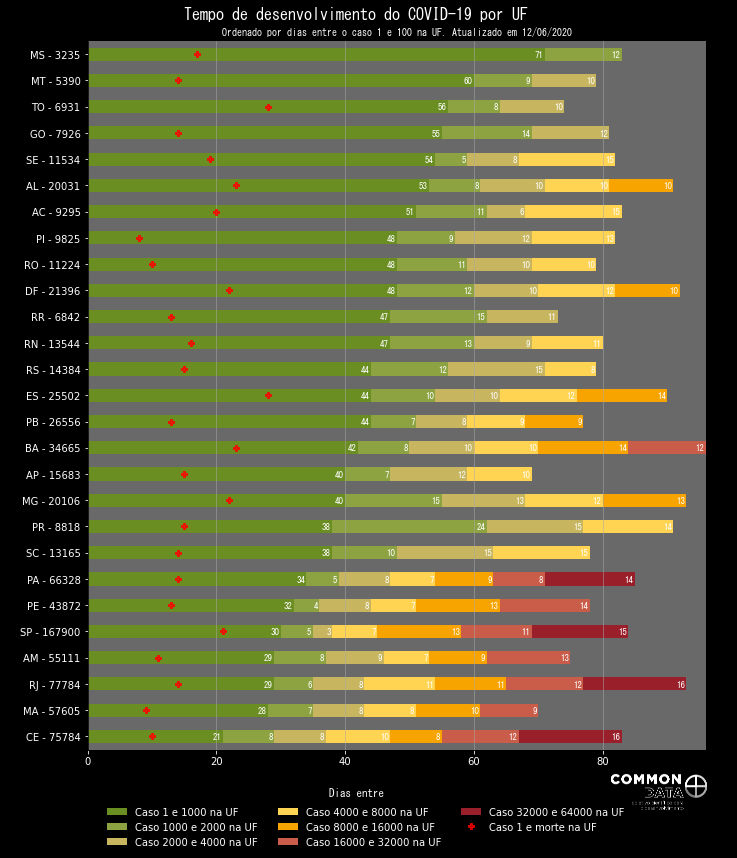

In [22]:
# Without grey and ordered by First UF with cases

covid_uf_summary.sort_values(by=["Dias entre Caso 1 e 1000 na UF", "new_confirmed"]
                             , ascending = (True, False), inplace=True)

creating_graph(covid_uf_summary, "dias entre o caso 1 e 100 na UF", 0)
    
plt.savefig('Tempo de desenvolvimento do Covid por estado_semcinza_primeiro atingidas.png', facecolor="black")

C:\Users\Camila\anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


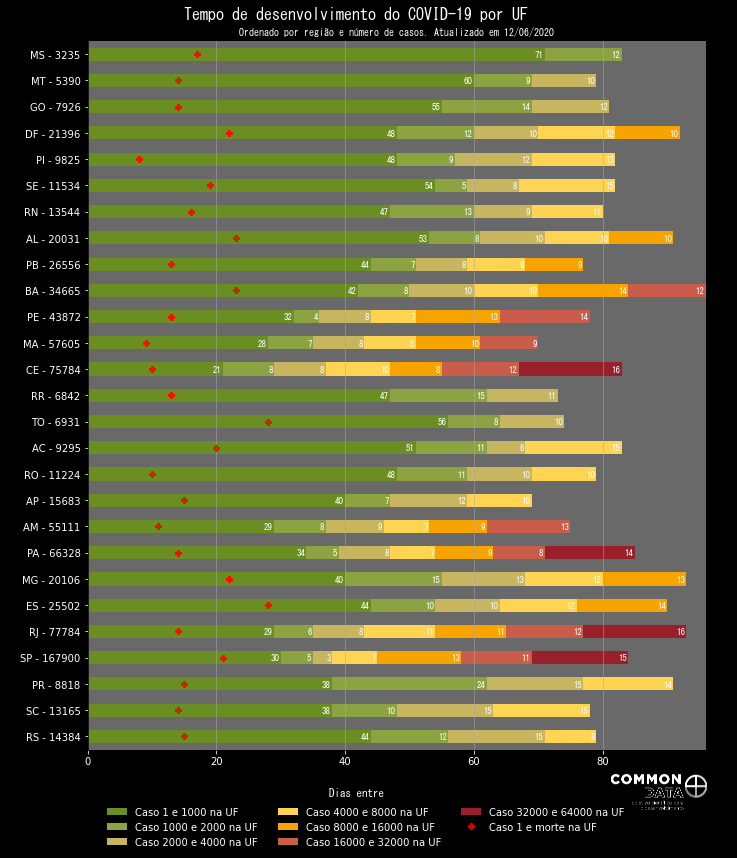

In [23]:
# Without grey and ordered by Region and # cases

covid_uf_summary.sort_values(by=["Region", "new_confirmed"]
                             , ascending = (False, False), inplace=True)

creating_graph(covid_uf_summary, "região e número de casos", 0)
    
plt.savefig('Tempo de desenvolvimento do Covid por estado_semcinza_regiao.png', facecolor="black")

## Desenvolvimento por dia

In [24]:
# Preparando os dados porque precisamos repetir o mesmo valor se nao teve casos no dia e no banco anterior estava excluindo
covid_uf_day = covid_munic[covid_munic["place_type"] == "state"].groupby(["state", 
            "date"])["new_confirmed", "new_deaths", "last_available_confirmed", "last_available_deaths"].sum().reset_index()
covid_uf_day["date"] = pd.to_datetime(covid_uf_day['date'], format="%Y/%m/%d")

covid_uf_day = covid_uf_day[ covid_uf_day["date"] < max(covid_uf_day["date"])]

covid_uf_day["log_confirmed"] = np.log10(covid_uf_day["last_available_confirmed"])
covid_uf_day["log_death"] = np.log10(covid_uf_day["last_available_deaths"])

#Creating a label for the graph with # cases
# covid_uf_day["Estado"] = [' - '.join(i) for i in 
#                               zip(covid_uf_summary.index.values, covid_uf_summary["new_confirmed"].map(str) )]

# Create Region
covid_uf_day['Region'] = covid_uf_day["state"].map(region)


covid_uf_day.tail()

C:\Users\Camila\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Camila\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,state,date,new_confirmed,new_deaths,last_available_confirmed,last_available_deaths,log_confirmed,log_death,Region
2509,TO,2020-06-08,408,15,6052,114,3.781899,2.056905,Norte
2510,TO,2020-06-09,205,6,6257,120,3.796366,2.079181,Norte
2511,TO,2020-06-10,272,4,6529,124,3.814847,2.093422,Norte
2512,TO,2020-06-11,215,4,6744,128,3.828918,2.107210,Norte
2513,TO,2020-06-12,187,2,6931,130,3.840796,2.113943,Norte


In [25]:
# Just checking what our heatmap will look like
graph = pd.crosstab(index=[covid_uf_day["Region"], covid_uf_day["state"]], columns=covid_uf_day["date"], 
                    values=covid_uf_day["new_confirmed"], aggfunc="max")
graph.head()

date                2020-02-25  2020-02-26  2020-02-27  2020-02-28  \
Region       state                                                   
Centro Oeste DF            NaN         NaN         NaN         NaN   
             GO            NaN         NaN         NaN         NaN   
             MS            NaN         NaN         NaN         NaN   
             MT            NaN         NaN         NaN         NaN   
Nordeste     AL            NaN         NaN         NaN         NaN   

date                2020-02-29  2020-03-01  2020-03-02  2020-03-03  \
Region       state                                                   
Centro Oeste DF            NaN         NaN         NaN         NaN   
             GO            NaN         NaN         NaN         NaN   
             MS            NaN         NaN         NaN         NaN   
             MT            NaN         NaN         NaN         NaN   
Nordeste     AL            NaN         NaN         NaN         NaN   

date                2020-03-04  2020-03-05  ...  2020-06-03  2020-06-04  \
Region       state                          ...                           
Centro Oeste DF            NaN         NaN  ...       764.0       903.0   
             GO            NaN         NaN  ...       215.0       401.0   
             MS            NaN         NaN  ...       123.0        72.0   
             MT            NaN         NaN  ...       212.0       359.0   
Nordeste     AL            NaN         NaN  ...       848.0       689.0   

date                2020-06-05  2020-06-06  2020-06-07  2020-06-08  \
Region       state                                                   
Centro Oeste DF         1285.0      1642.0       773.0       325.0   
             GO          503.0       165.0        87.0       445.0   
             MS          135.0       121.0        71.0       131.0   
             MT          205.0       195.0       245.0       210.0   
Nordeste     AL          843.0      1767.0       633.0         0.0   

date                2020-06-09  2020-06-10  2020-06-11  2020-06-12  
Region       state                                                  
Centro Oeste DF         1142.0      1343.0      1074.0       889.0  
             GO          634.0       444.0       394.0       152.0  
             MS          142.0       256.0       148.0       234.0  
             MT          261.0       258.0       324.0       304.0  
Nordeste     AL          854.0       983.0      1024.0       831.0  

[5 rows x 109 columns]

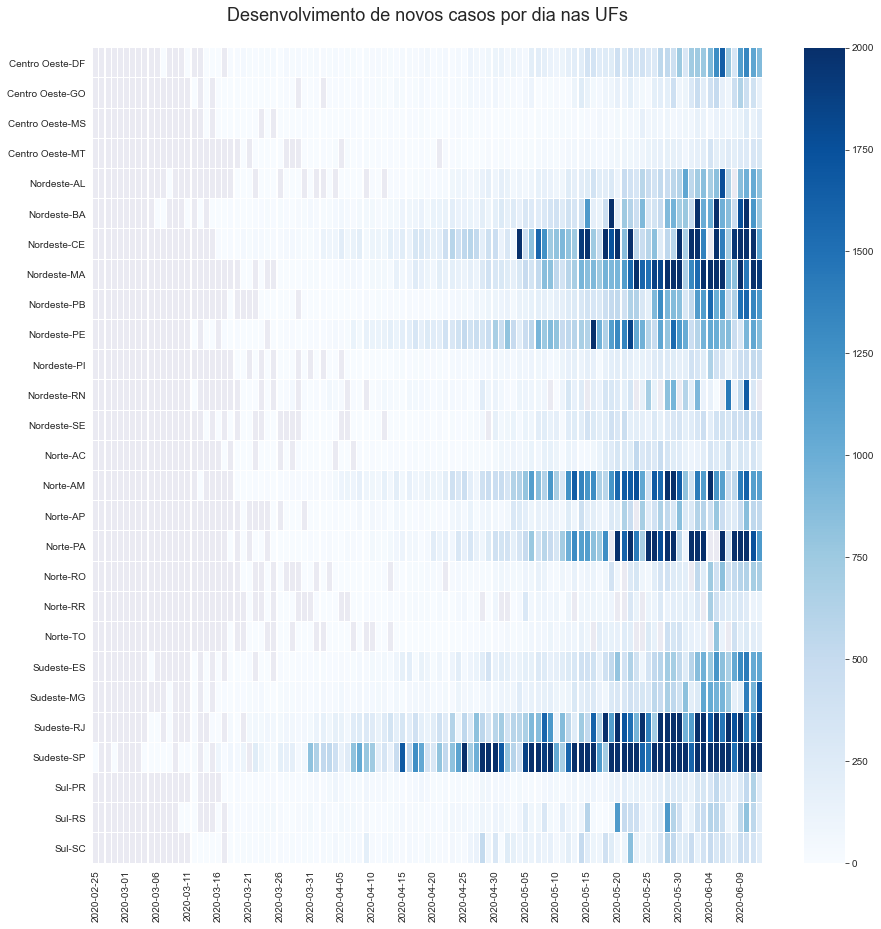

In [26]:
graph = pd.crosstab(index=[covid_uf_day["Region"], covid_uf_day["state"]], columns=covid_uf_day["date"], 
                    values=covid_uf_day["new_confirmed"], aggfunc="max").replace(0, np.nan)

import seaborn as sns
# import colorsys

sns.set_style("dark")

# colors = ["#6B8E23", "#8da341", "#c7b65f", "#FFD453", "#F7A400", "#CA5C4A", "#991f2a"]
# colors = ["#6B8E23", "#708224", "#757525", "#7A6925", "#7F5D26", "#855027", '#8A4428', '#8F3828', '#942B29', "#991f2a"]
# colors = ['#ffba08', '#faa307', '#f48c06', '#e85d04', '#dc2f02', '#d00000', '#9d0208', '#6a040f', '#370617', '#03071e']

# listaHSV = [(x*1.0/10, 0.2, 0.7) for x in range(10)]
# listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

f, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(graph, annot=False, linewidths=.1, ax=ax, cmap="Blues", vmin=0, vmax=2000, xticklabels=5, yticklabels=1)
hm.set_title("Desenvolvimento de novos casos por dia nas UFs\n", fontsize=18)
ax.set(xlabel="", ylabel="")

ax.set_xticklabels([i.get_text()[:10] for i in ax.get_xticklabels() ])

plt.show()

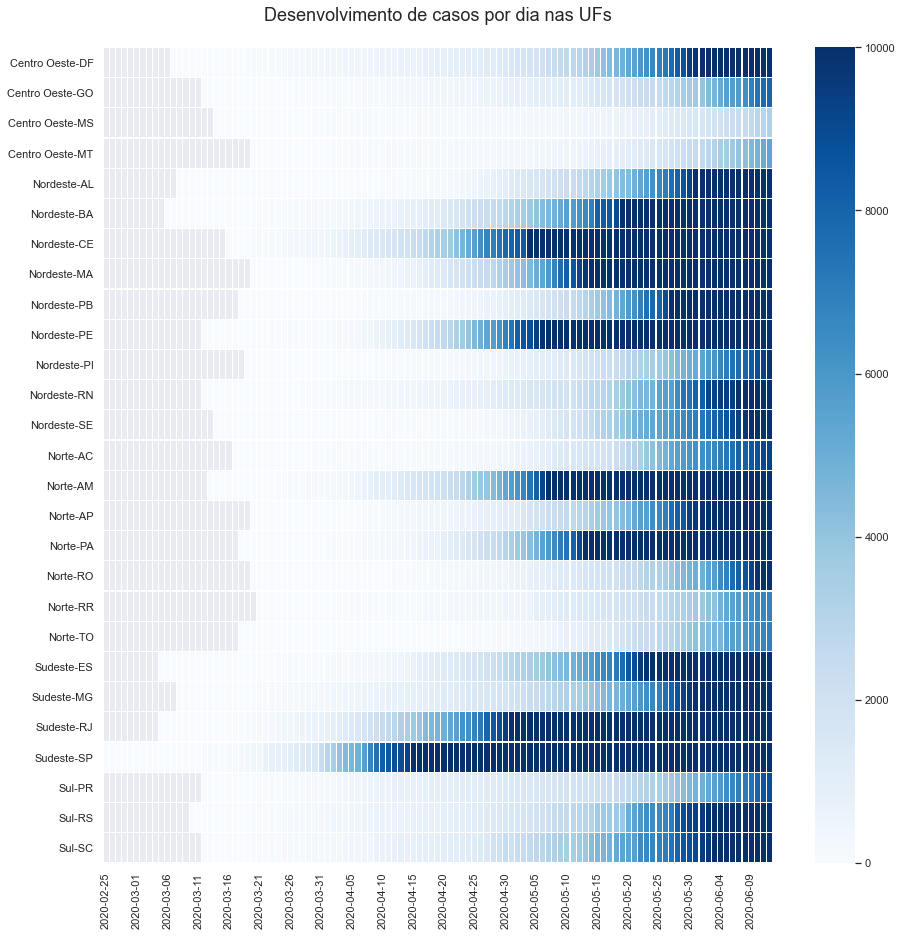

In [27]:
graph = pd.crosstab(index=[covid_uf_day["Region"], covid_uf_day["state"]], columns=covid_uf_day["date"], 
                    values=covid_uf_day["last_available_confirmed"], aggfunc="max").replace(0, np.nan)

import seaborn as sns
sns.set()

f, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(graph, annot=False, linewidths=.1, ax=ax, cmap="Blues", vmin=0, vmax=10000, xticklabels=5, yticklabels=1)
hm.set_title("Desenvolvimento de casos por dia nas UFs\n", fontsize=18)
ax.set(xlabel="", ylabel="")

ax.set_xticklabels([i.get_text()[:10] for i in ax.get_xticklabels() ])

plt.show()

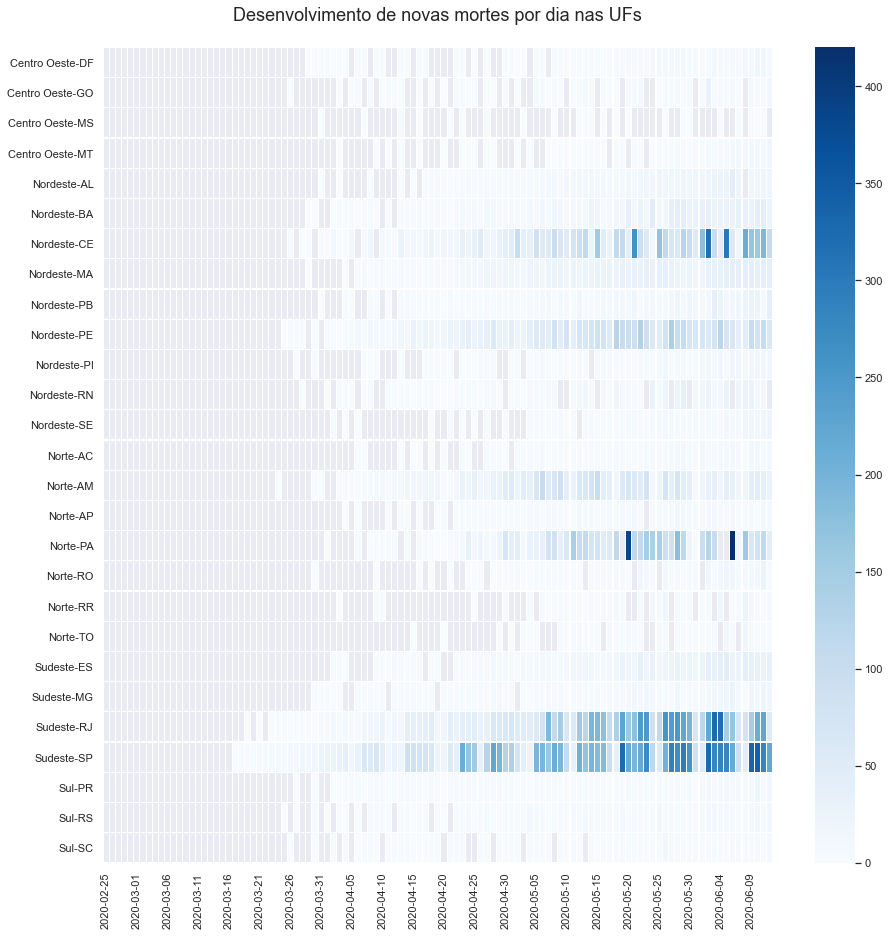

In [28]:
graph = pd.crosstab(index=[covid_uf_day["Region"], covid_uf_day["state"]], columns=covid_uf_day["date"], 
                    values=covid_uf_day["new_deaths"], aggfunc="max").replace(0, np.nan)

import seaborn as sns
sns.set()

f, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(graph, annot=False, linewidths=.1, ax=ax, cmap="Blues", vmin=0, xticklabels=5, yticklabels=1)
hm.set_title("Desenvolvimento de novas mortes por dia nas UFs\n", fontsize=18)
ax.set(xlabel="", ylabel="")

ax.set_xticklabels([i.get_text()[:10] for i in ax.get_xticklabels() ])

plt.show()

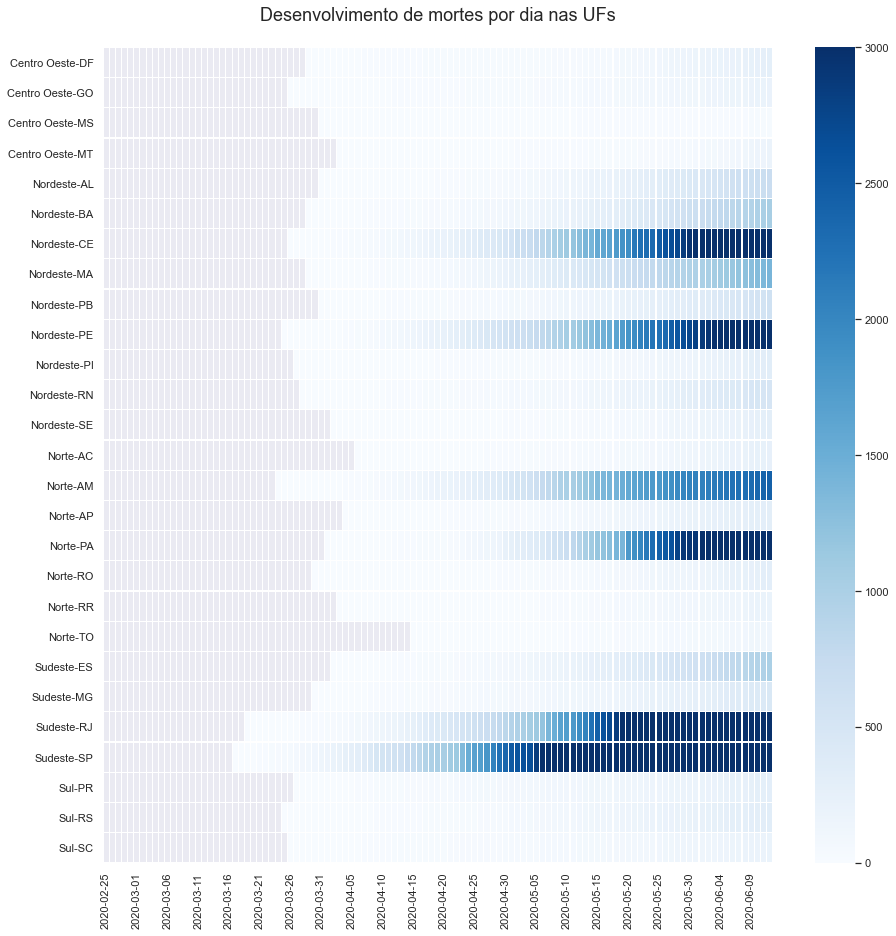

In [29]:
graph = pd.crosstab(index=[covid_uf_day["Region"], covid_uf_day["state"]], columns=covid_uf_day["date"], 
                    values=covid_uf_day["last_available_deaths"], aggfunc="max").replace(0, np.nan)

import seaborn as sns
sns.set()

f, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(graph, annot=False, linewidths=.1, ax=ax, cmap="Blues", vmin=0, vmax=3000, xticklabels=5, yticklabels=1)
hm.set_title("Desenvolvimento de mortes por dia nas UFs\n", fontsize=18)
ax.set(xlabel="", ylabel="")

ax.set_xticklabels([i.get_text()[:10] for i in ax.get_xticklabels() ])

plt.show()